# Regression Analysis with Python
We apply regression analysis to the publically available housing dataset
We first plot few figures inspecting the relationship between the different features and the target value
We then fit several linear regression models available on sklearn and compare them using R^2
We also tackle overfitting issues by using regularized regression models and eliminating outliers
Polynomial regression models and decision tree regressors are also implemented and checked for R^2

## Covariance and heatmap plots
we first investigate the relationship between features and target values through couple intresting graphs. We can see there are few dependencies in the data that could justify the use of a regression model. 

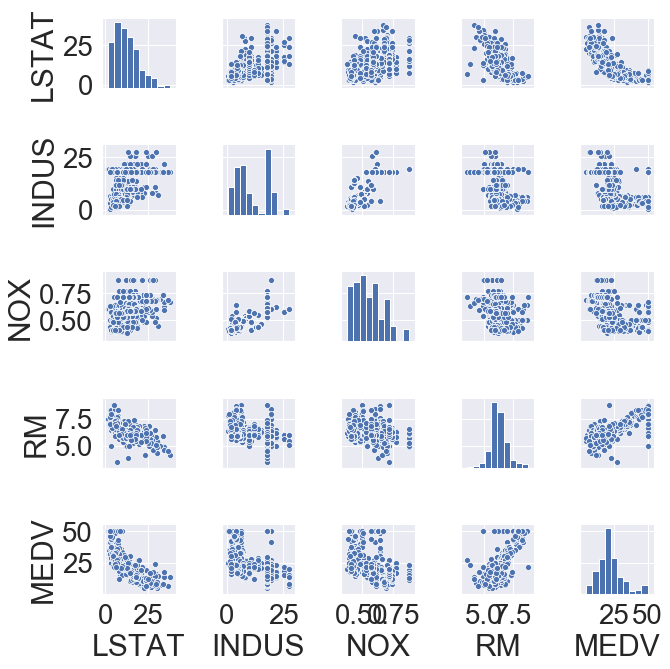

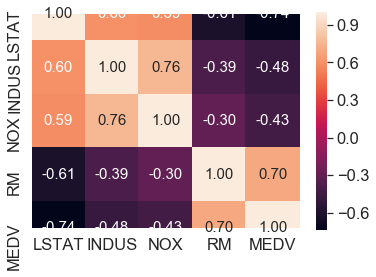

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# downloading housing data
df=pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',header=None,sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#print(df.head())
X=df.iloc[:,0:13:].values
Y=df.loc[:,'MEDV'].values
##

#corelation between variable (pair)
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols],height=2)
plt.tight_layout()
plt.show()

#plot corelation matrix using heatmap
corr=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(corr,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

#LSTAT has good correlation but from previous graph we can see nonlinear relationship, try RM has high corelation and linear
#RM good to try to fit out first simple linear regression



## fitting a linear regression for 1 feature
We fit a linear regressor clf on the number of rooms feature and determine the regression coef + intercept 
We also our regression graph 

reg coef for RM is 9.102
intercept of our regression is -34.671


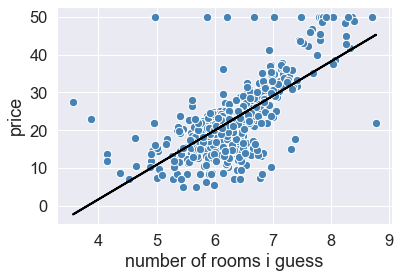

In [7]:
from sklearn.linear_model import LinearRegression
#trying out regression for MEDV and RM
X=df[['RM']].values
Y=df['MEDV'].values
lr=LinearRegression()
lr.fit(X,Y)
print("reg coef for RM is %.3f" % lr.coef_[0])
print("intercept of our regression is %.3f" % lr.intercept_)

#plotting our reg
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X,Y,lr)
plt.xlabel('number of rooms i guess')
plt.ylabel('price')
plt.show()



## Ransac and Regularized regression model

We fit a RANSAC in an effort to eliminate outliers
We also try to tackle overfitting issues by fitting regularized regression models
We plot few graphs and compare R^2 for all the fitted models

coef is 10.735 and intercept is -44.089


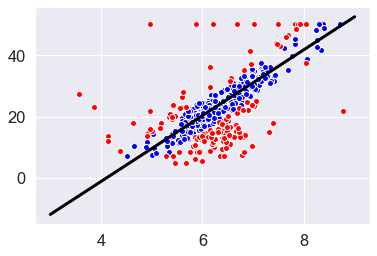

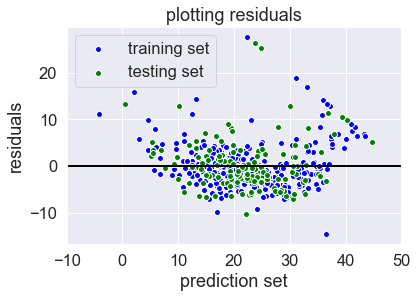

mean squared error for training: 19.958
mean squared error for testing: 27.196
R^2 train: 0.765 
R^2 test: 0.673
R^2 for ridge: 0.669
R^2 for lasso: 0.612
R^2 for elasticnet: 0.643


In [14]:
X=df[['RM']].values
Y=df['MEDV'].values
#trying to fit a model without outliers (very subjectiove require intuition for threshholds)
from sklearn.linear_model import RANSACRegressor
rr=RANSACRegressor(LinearRegression(),min_samples=50,residual_threshold=5.0,max_trials=100,loss='absolute_loss',random_state=0)
rr.fit(X,Y)
print("coef is %.3f and intercept is %.3f" %( rr.estimator_.coef_[0],rr.estimator_.intercept_))

#trying to plot highighting outliers
X_mo=np.arange(3,10,1)
inliners=rr.inlier_mask_
outliners=np.logical_not(inliners)
plt.scatter(X[inliners],Y[inliners],c='blue',edgecolors='white')
plt.scatter(X[outliners],Y[outliners],c='red',edgecolors='white')
plt.plot(X_mo,rr.predict(X_mo[:,np.newaxis]),color='black',lw=3)
plt.show()

#good old train split fit predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

X=df.iloc[:,:-1].values
Y=df['MEDV'].values
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=0)
lrr=LinearRegression()
lrr.fit(X_train,Y_train)
Y_tr_pre=lrr.predict(X_train)
Y_te_pre=lrr.predict(X_test)

#plotting residuals since too much complexity
plt.scatter(Y_tr_pre,Y_train-Y_tr_pre,c='blue',edgecolors='white',label='training set')
plt.scatter(Y_te_pre,Y_test-Y_te_pre,c='green',edgecolors='white',label='testing set')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.title('plotting residuals')
plt.xlabel('prediction set')
plt.ylabel('residuals')
plt.legend(loc='best')
plt.show()
#mean sqd error using sklearn
print("mean squared error for training: %.3f" % mean_squared_error(Y_train,Y_tr_pre))
print("mean squared error for testing: %.3f" % mean_squared_error(Y_test,Y_te_pre))
print("R^2 train: %.3f \nR^2 test: %.3f" %(r2_score(Y_train,Y_tr_pre),r2_score(Y_test,Y_te_pre)))

#trying to improve this stuff using ridge, lasso, and elastic net

rd=Ridge(alpha=0.5)
las=Lasso(alpha=1.0)
ela=ElasticNet(alpha=0.5,l1_ratio=1.0)
#fitting
rd.fit(X_train,Y_train)
las.fit(X_train,Y_train)
ela.fit(X_train,Y_train)
#predicting
y_rd=rd.predict(X_test)
y_las=las.predict(X_test)
y_ela=ela.predict(X_test)
#check r^2 for new models
print("R^2 for ridge: %.3f" % r2_score(Y_test,y_rd))
print("R^2 for lasso: %.3f" % r2_score(Y_test,y_las))
print("R^2 for elasticnet: %.3f" % r2_score(Y_test,y_ela))




## Polynomial Regression models

Polynomial regression models are constructed and fitted to the housing dataset


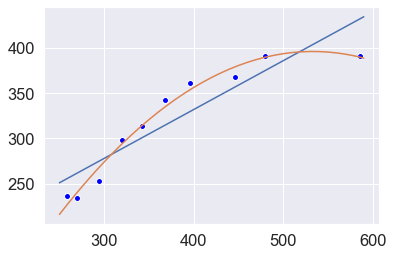

linear r2 score 0.798
poly r2 score 0.982
mean squared for linear 38.483 and r^2 is 0.544
mean squared for poly2 30.331 and r^2 is 0.641
mean squared for poly3 28.884 and r^2 is 0.658


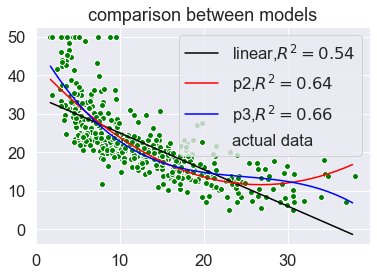

In [10]:
#starting with polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0,368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2,342.2, 360.8, 368.0, 391.2, 390.8])

LRE=LinearRegression()
LRE1=LinearRegression()
popo=PolynomialFeatures(degree=2)
X_poly=popo.fit_transform(X)
#compare linear regression and modified one with poly feature
X_fit = np.arange(250,600,10)[:, np.newaxis]
LRE.fit(X,y)
LRE1.fit(X_poly,y)
plt.scatter(X,y,c='blue',edgecolors='white')
plt.plot(X_fit,LRE.predict(X_fit))
plt.plot(X_fit,LRE1.predict(popo.fit_transform(X_fit)))
plt.show()

#looks like poly fits better than linear, check by r2
print("linear r2 score %.3f" % r2_score(LRE.predict(X),y))
print("poly r2 score %.3f" % r2_score(LRE1.predict(X_poly),y))

#enough toying, lets do stuff on the housing data
#we will test linear, poly 2, and cubic
X=df[['LSTAT']].values
Y=df['MEDV'].values
#imma try to make a pipeline/answer: not practical abort
p2=PolynomialFeatures(degree=2)
p3=PolynomialFeatures(degree=3)
lino=LinearRegression()
l2=LinearRegression()
l3=LinearRegression()
X21=p2.fit_transform(X)
X31=p3.fit_transform(X)
#fitting and stuff
lino.fit(X,Y)
l2.fit(X21,Y)
l3.fit(X31,Y)

y_lin=lino.predict(X)
y2=l2.predict(X21)
y3=l3.predict(X31)
#check performance
print("mean squared for linear %.3f and r^2 is %.3f" %(mean_squared_error(Y,y_lin),r2_score(Y,y_lin)))
print("mean squared for poly2 %.3f and r^2 is %.3f" %(mean_squared_error(Y,y2),r2_score(Y,y2)))
print("mean squared for poly3 %.3f and r^2 is %.3f" %(mean_squared_error(Y,y3),r2_score(Y,y3)))

#plotting 
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X2=p2.fit_transform(X_fit)
X3=p3.fit_transform(X_fit)
plt.scatter(X,Y,c='green',edgecolors='white',label='actual data')
plt.plot(X_fit,lino.predict(X_fit),color='black',label='linear,$R^2=%.2f$' % r2_score(Y,y_lin))
plt.plot(X_fit,l2.predict(X2),color='red',label='p2,$R^2=%.2f$' % r2_score(Y,y2))
plt.plot(X_fit,l3.predict(X3),color='blue',label='p3,$R^2=%.2f$' % r2_score(Y,y3))
plt.title("comparison between models")
plt.legend(loc='upper right')

plt.show()



## Decision Tree Regressors
A decision tree regressor is fitted to the dataset. We plot the graph of our regression and compute its MSE and R^2

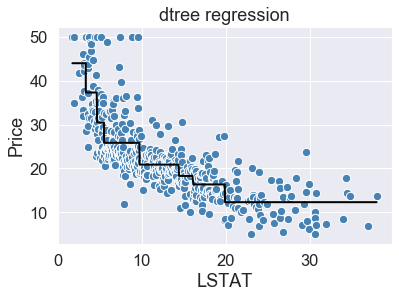

MSE 1.641 and R^2 0.979 for training
MSE 11.056 and R^2 0.878 for test


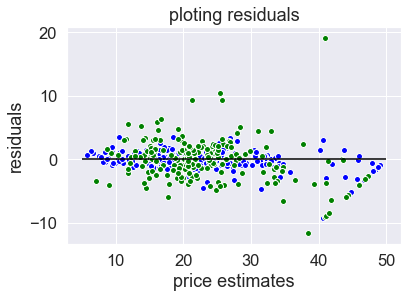

In [11]:
#trying tree regressor
#IMPORTANT: lin_regplot needs data to be argsorted 

from sklearn.tree import DecisionTreeRegressor

X=df[['LSTAT']].values
Y=df['MEDV'].values
dtr=DecisionTreeRegressor(max_depth=3)
dtr.fit(X,Y)
indexo=X.flatten().argsort()
lin_regplot(X[indexo],Y[indexo],dtr)
plt.xlabel("LSTAT")
plt.ylabel("Price")
plt.title("dtree regression")
plt.show()

#now trying random forest/  we will use test train and stuff
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:, :-1].values
Y=df['MEDV'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=1)
rf=RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
rf.fit(X_train,Y_train)
X_r_pred=rf.predict(X_train)
X_t_pred=rf.predict(X_test)
print("MSE %.3f and R^2 %.3f for training" %(mean_squared_error(Y_train,X_r_pred),r2_score(Y_train,X_r_pred)))
print("MSE %.3f and R^2 %.3f for test" %(mean_squared_error(Y_test,X_t_pred),r2_score(Y_test,X_t_pred)))

#too many features to plot so we plot risiduals
plt.scatter(X_r_pred,(X_r_pred-Y_train),c='blue',edgecolors='white',label='training')
plt.scatter(X_t_pred,X_t_pred-Y_test,c='green',edgecolors='white',label='test')
plt.hlines(0,Y.min(),Y.max(),colors='black')
plt.xlabel('price estimates')
plt.ylabel('residuals')
plt.title('ploting residuals')
plt.show()


